In [4]:
import sklearn, numpy as np, pandas as pd
import matplotlib, seaborn, plotly
import graphviz

print(f'sklearn: {sklearn.__version__}')
print(f'numpy: {np.__version__}')
print(f'pandas: {pd.__version__}')
print(f'matplotlib: {matplotlib.__version__}')
print(f'seaborn: {seaborn.__version__}')
print(f'plotly: {plotly.__version__}')

sklearn: 1.7.2
numpy: 2.3.3
pandas: 2.3.3
matplotlib: 3.10.7
seaborn: 0.13.2
plotly: 6.3.1


In [5]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (150, 4)
y shape: (150,)


In [10]:
import pandas as pd

iris = load_iris()
iris_data = iris.data
print(iris.feature_names)

iris_label = iris.target

iris_df = pd.DataFrame(data = iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


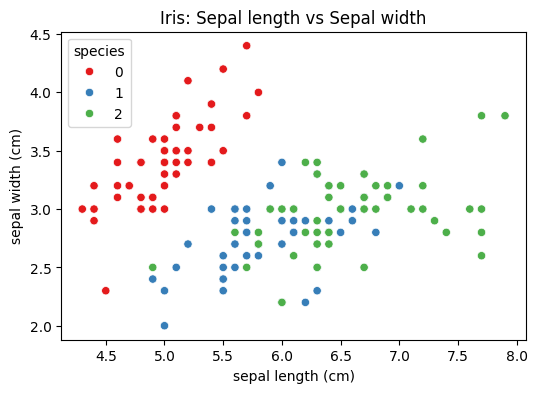

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df["species"] = y

plt.figure(figsize = (6,4))
sns.scatterplot(
    data=iris_df,
    x ="sepal length (cm)", y="sepal width (cm)",
    hue = "species", palette="Set1"
)
plt.title("Iris: Sepal length vs Sepal width")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)
print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)

Train: (120, 4) (120,)
Test : (30, 4) (30,)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"DecisionTree Accuracy: {acc_dt:.3f}")

DecisionTree Accuracy: 0.933


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

RANDOM_STATE = 42

lr = LogisticRegression(max_iter=2000, random_state=RANDOM_STATE)
lr.fit(X_train, y_train)
acc_lr = accuracy_score(y_test, lr.predict(X_test))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
acc_knn = accuracy_score(y_test, knn.predict(X_test))

pd.DataFrame({
    "model": ["DecisionTree", "LogisticRegression", "KNN(k=5)"],
    "param" : ["default", "max_iter=2000", "n_neighbors=5"],
    "accuracy": [acc_dt, acc_lr, acc_knn]

}).sort_values("accuracy", ascending=False).reset_index(drop=True)


,model,param,accuracy
0,KNN(k=5),n_neighbors=5,1.000000
1,LogisticRegression,max_iter=2000,0.966667
2,DecisionTree,default,0.933333


In [18]:
#실습
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt2 = DecisionTreeClassifier(max_depth = 2, random_state=RANDOM_STATE)
dt2.fit(X_train, y_train)
y_pred_dt2 = dt2.predict(X_test)
acc_dt2 = accuracy_score(y_test, y_pred_dt2)
print(f"DecisionTree Accuracy: {acc_dt2:.3f}")

dt3 = DecisionTreeClassifier(max_depth = 3, random_state=RANDOM_STATE)
dt3.fit(X_train, y_train)
y_pred_dt3 = dt3.predict(X_test)
acc_dt3 = accuracy_score(y_test, y_pred_dt3)
print(f"DecisionTree Accuracy: {acc_dt3:.3f}")

dt_full = DecisionTreeClassifier(max_depth = None, random_state=RANDOM_STATE)
dt_full.fit(X_train, y_train)
y_pred_dt_full = dt_full.predict(X_test)
acc_dt_full = accuracy_score(y_test, y_pred_dt_full)
print(f"DecisionTree Accuracy: {acc_dt_full:.3f}")

DecisionTree Accuracy: 0.933
DecisionTree Accuracy: 0.967
DecisionTree Accuracy: 0.933


In [17]:
for d in [2, 3, None]:
    dt = DecisionTreeClassifier(max_depth=d, random_state=RANDOM_STATE)
    dt.fit(X_train, y_train)
    print(f"max_depth={d}, Train Acc={dt.score(X_train, y_train):.3f}, Test Acc={dt.score(X_test, y_test):.3f}")


max_depth=2, Train Acc=0.967, Test Acc=0.933
max_depth=3, Train Acc=0.983, Test Acc=0.967
max_depth=None, Train Acc=1.000, Test Acc=0.933
